# Import

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
%matplotlib inline
pd.options.display.max_columns = None

# Data

In [64]:
atp=pd.read_csv("ATP.csv", dtype='str')

In [71]:
atp.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32.0,A,2000-05-01,1,102179,NaN,NaN,Antony Dupuis,R,185,FRA,27.18138261,113,351,102776,1,NaN,Andrew Ilie,R,180,AUS,24.03559206,50,762,3-6 7-6(6) 7-6(4),3,R32,162,8,1,126,76,56,29,16,14,15,13,4,110,59,49,31,17,4,4
1,2000-717,Orlando,Clay,32.0,A,2000-05-01,2,103602,NaN,Q,Fernando Gonzalez,R,183,CHI,19.75633128,352,76,102821,NaN,WC,Cecil Mamiit,R,173,PHI,23.84394251,139,280,6-2 7-5,3,R32,86,4,2,67,35,25,16,10,4,6,0,0,57,24,13,17,10,4,9
2,2000-717,Orlando,Clay,32.0,A,2000-05-01,3,103387,NaN,NaN,Paradorn Srichaphan,R,185,THA,20.88158795,103,380,102205,NaN,NaN,Sebastien Lareau,R,183,CAN,27.01163587,133,293,6-1 6-3,3,R32,64,4,1,46,29,23,11,8,0,0,2,2,65,39,22,10,8,6,10
3,2000-717,Orlando,Clay,32.0,A,2000-05-01,4,101733,NaN,NaN,Jan Siemerink,L,183,NED,30.04791239,107,371,102925,8,NaN,Justin Gimelstob,R,196,USA,23.26078029,95,408,4-6 6-2 7-5,3,R32,150,8,6,109,56,43,21,15,9,12,4,6,104,57,35,24,15,6,11
4,2000-717,Orlando,Clay,32.0,A,2000-05-01,5,101727,4,NaN,Jason Stoltenberg,R,185,AUS,30.0752909,74,543,101826,NaN,NaN,Alex Lopez Moron,R,175,ESP,29.42368241,111,357,6-1 6-4,3,R32,60,3,0,50,27,22,16,9,1,1,0,3,47,28,17,10,8,3,6


# Format Data with Correct Data Type

In [72]:
cat_col=['tourney_id',
 'tourney_name',
 'surface',
 'tourney_level',
 'winner_entry',
 'winner_name',
 'winner_hand',
 'winner_ioc',
 'loser_name',
 'loser_hand',
 'loser_ioc',
 'score',
 'round']
num_col=['draw_size',
 'match_num',
 'winner_id',
 'winner_seed',
 'winner_ht',
 'winner_age',
 'winner_rank',
 'winner_rank_points',
 'loser_id',
 'loser_seed',
 'loser_entry', 
 'loser_ht',
 'loser_age',
 'loser_rank',
 'loser_rank_points',
 'best_of',
 'minutes',
 'w_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced',
 'l_ace',
 'l_df',
 'l_svpt',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_bpSaved',
 'l_bpFaced']
date_col=['tourney_date']

In [88]:
atp[num_col] = atp[num_col].apply(pd.to_numeric, errors='coerce', axis=1)

In [93]:
atp['tourney_date']=pd.to_datetime(atp.tourney_date, format='%Y%m%d')

In [94]:
atp.dtypes

tourney_id                    object
tourney_name                  object
surface                       object
draw_size                    float64
tourney_level                 object
tourney_date          datetime64[ns]
match_num                    float64
winner_id                    float64
winner_seed                  float64
winner_entry                  object
winner_name                   object
winner_hand                   object
winner_ht                    float64
winner_ioc                    object
winner_age                   float64
winner_rank                  float64
winner_rank_points           float64
loser_id                     float64
loser_seed                   float64
loser_entry                  float64
loser_name                    object
loser_hand                    object
loser_ht                     float64
loser_ioc                     object
loser_age                    float64
loser_rank                   float64
loser_rank_points            float64
s

# Reformat Data Frame

Show obeservation by player instead of by match

In [121]:
winner_cols = [col for col in atp.columns if ('winner' in col) or (col[:2]=="w_")]
loser_cols = [col for col in atp.columns if ('loser' in col) or (col[:2]=="l_")]

In [122]:
print(winner_cols)
print(loser_cols)

['winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced']
['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'loser_rank', 'loser_rank_points', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']


In [127]:
common_cols = [col for col in atp.columns if (col not in winner_cols) and (col not in loser_cols)]

In [128]:
print(common_cols)

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes']


In [157]:
w_cols=winner_cols + common_cols
l_cols=loser_cols + common_cols
print(w_cols)
print(l_cols)

['winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes']
['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'loser_rank', 'loser_rank_points', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes']


In [162]:
w_df=atp[w_cols]
w_df.assign(result=1)
w_df=w_df.rename(columns=lambda x: x.replace('winner', 'player'))
w_df=w_df.rename(columns=lambda x: x.replace('w_', ''))
w_df

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,player_rank,player_rank_points,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,tourney_id,tourney_name,surface,drasize,tourney_level,tourney_date,match_num,score,best_of,round,minutes
0,102179.0,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,1.0,3-6 7-6(6) 7-6(4),3.0,R32,162.0
1,103602.0,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,2.0,6-2 7-5,3.0,R32,86.0
2,103387.0,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,3.0,6-1 6-3,3.0,R32,64.0
3,101733.0,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,4.0,4-6 6-2 7-5,3.0,R32,150.0
4,101727.0,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,5.0,6-1 6-4,3.0,R32,60.0
5,103181.0,NaN,NaN,Jiri Vanek,R,185.0,CZE,22.020534,92.0,429.0,9.0,4.0,95.0,60.0,43.0,26.0,16.0,5.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,6.0,6-7(2) 6-4 6-3,3.0,R32,115.0
6,101675.0,NaN,NaN,Martin Rodriguez,R,178.0,ARG,30.368241,120.0,322.0,4.0,11.0,148.0,65.0,54.0,43.0,18.0,9.0,12.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,7.0,6-7(7) 7-6(2) 7-6(3),3.0,R32,171.0
7,102834.0,5.0,NaN,Paul Goldstein,R,178.0,USA,23.739904,79.0,516.0,1.0,1.0,42.0,23.0,19.0,13.0,8.0,0.0,0.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,8.0,6-2 6-1,3.0,R32,66.0
8,103454.0,6.0,NaN,Nicolas Massu,R,183.0,CHI,20.558522,89.0,464.0,2.0,2.0,49.0,30.0,26.0,10.0,9.0,3.0,4.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,9.0,6-2 6-3,3.0,R32,63.0
9,102466.0,NaN,NaN,Jan Kroslak,R,188.0,SVK,25.538672,125.0,315.0,7.0,2.0,83.0,55.0,42.0,14.0,14.0,3.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,10.0,6-1 3-6 7-6(4),3.0,R32,123.0


In [160]:
l_df=atp[l_cols]
l_df.assign(result=0)
l_df=l_df.rename(columns=lambda x: x.replace('loser', 'player'))
l_df=l_df.rename(columns=lambda x: x.replace('l_', ''))
l_df

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,player_rank,player_rank_points,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes
0,102776.0,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,1.0,3-6 7-6(6) 7-6(4),3.0,R32,162.0
1,102821.0,NaN,NaN,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,2.0,6-2 7-5,3.0,R32,86.0
2,102205.0,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,3.0,6-1 6-3,3.0,R32,64.0
3,102925.0,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,4.0,4-6 6-2 7-5,3.0,R32,150.0
4,101826.0,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,5.0,6-1 6-4,3.0,R32,60.0
5,101885.0,NaN,NaN,Wayne Arthurs,L,190.0,AUS,29.122519,102.0,381.0,11.0,8.0,94.0,48.0,31.0,29.0,15.0,6.0,9.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,6.0,6-7(2) 6-4 6-3,3.0,R32,115.0
6,102455.0,NaN,NaN,Lorenzo Manta,R,190.0,SUI,25.623546,112.0,356.0,5.0,5.0,126.0,70.0,45.0,36.0,18.0,3.0,6.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,7.0,6-7(7) 7-6(2) 7-6(3),3.0,R32,171.0
7,101086.0,NaN,NaN,Ronald Agenor,R,180.0,USA,35.463381,91.0,430.0,0.0,0.0,42.0,25.0,9.0,10.0,7.0,3.0,7.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,8.0,6-2 6-1,3.0,R32,66.0
8,102133.0,NaN,NaN,Laurence Tieleman,R,180.0,ITA,27.460643,97.0,404.0,2.0,3.0,47.0,25.0,13.0,10.0,8.0,3.0,7.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,9.0,6-2 6-3,3.0,R32,63.0
9,102966.0,NaN,NaN,Fredrik Jonsson,R,193.0,SWE,23.093771,117.0,342.0,3.0,2.0,102.0,62.0,43.0,14.0,14.0,9.0,13.0,2000-717,Orlando,Clay,32.0,A,2000-05-01,10.0,6-1 3-6 7-6(4),3.0,R32,123.0


In [ ]:
pd.concat(

# EDA Plots

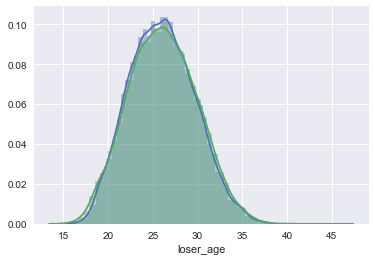

In [100]:
sns.distplot(atp.winner_age.dropna())
sns.distplot(atp.loser_age.dropna())

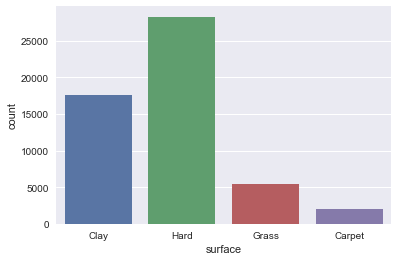

In [105]:
sns.countplot(x="surface",data=atp)

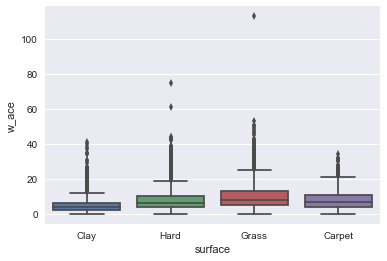

In [103]:
sns.boxplot(x="surface", y="w_ace", data=atp)

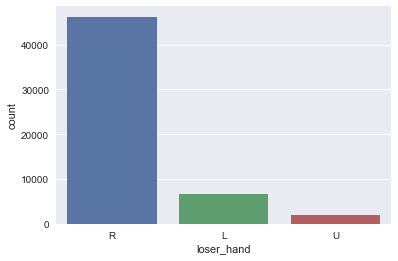

In [111]:
sns.countplot(x="winner_hand",data=atp)

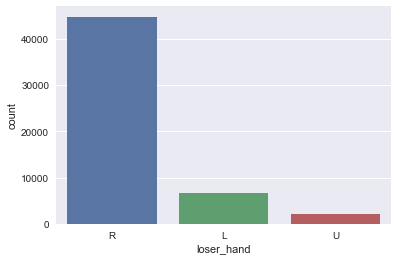

In [112]:
sns.countplot(x="loser_hand",data=atp)